### Trainsients tests with square-wave "pressure" conditioning parameter to visualize attack and decay characteristics

In [53]:
# Set parameter file and model to load
from utils.myUtils import mostRecent 

# chose an existing pickledParamFile and run loadModelForEvaluation
pickledParamFile = mostRecent("../RNNControl/model/*modelParams.pkl")
#pickledParamFile = mostRecent("/home/lonce/ZCODE/PYTORCH/RNNControl/model/*modelParams.pkl")
#pickledParamFile = '/home/lonce/ZCODE/PYTORCH/HUZ/RNNControl/model.WorkingTransients/modelParams.pkl'

# choose saved model to run (defaults to the last saved if loadmodelfile is undefined or None)
# Note: looks in same directory as pickledParamFile
loadModelFileName=None
#loadModelFileName='2019-01-22_12-01-39_model_epoch1_step16000.pth'
#loadModelFileName='2018-10-31_17-46-33_model_epoch1_step4000.pth'
#loadModelFileName='2018-10-31_16-47-25_model_epoch1_step4000.pth'

In [54]:
%run loadModelForEvaluation.ipynb

if 'sample_rate' not in params :   #older versions didn't save sample_rate
    params['sample_rate']=16000

python version 3.6.6
torch version 0.4.1
will read params from ../RNNControl/model/2019-01-29_09-59-53_modelParams.pkl
modelDir is ../RNNControl/model

 Saved Parameters:

{'batch_size': 256,
 'csvfile': '/home/lonce/ZCODE/PYTORCH/data/synth6476OddEvenConstantSlopeTransients_x2scaled/6476_ConstantSlopeTransient_x2scaled.csv',
 'datadir': '/home/lonce/ZCODE/PYTORCH/data/synth6476OddEvenConstantSlopeTransients_x2scaled/dataset',
 'hiNote': 76,
 'hiddenSize': 40,
 'lowNote': 64,
 'lr': 0.005,
 'max_steps': 18000,
 'nLayers': 4,
 'noise': 0.1,
 'num_epochs': 1,
 'paramdir': '/home/lonce/ZCODE/PYTORCH/data/synth6476OddEvenConstantSlopeTransients_x2scaled/dataparams',
 'props': ['instID', 'volume', 'midiPitch'],
 'runTimeStamp': '2019-01-29_09-59-53',
 'sample_rate': 16000,
 'savedModel': '2019-01-29_09-59-53_model_epoch1_step18000.pth',
 'savedSteps': 18000,
 'savemodel': True,
 'savemodel_interval': 500,
 'savemodeldir': '/home/lonce/ZCODE/PYTORCH/RNNControl/model',
 'seqLen': 256,
 'strid

### Primer  
<a id="primer"></a>

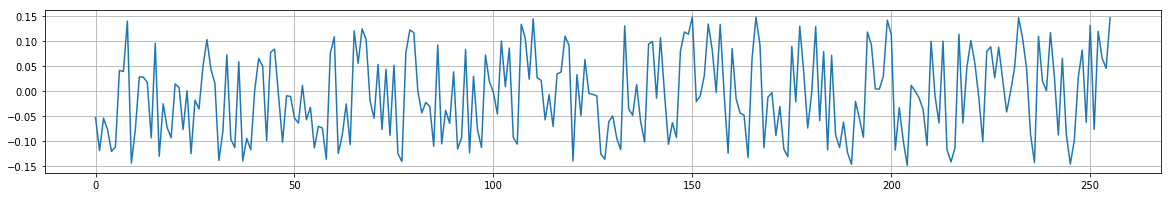

In [55]:
# Make noisy nuetral Priming signal 
myp=np.zeros([1,seqLen,len(params['props'])+1])
# !! PRIMING DOES MATTER - has to be a certain level of noise
myp[0,:,0]=.3*np.random.ranf([seqLen])-.15 #signal
myp[0,:,1]= .45+.1*np.random.ranf([seqLen])     #instrument
myp[0,:,2]= .5*np.random.ranf([seqLen])    #pressure1
#myp[0,:,3]=1-myp[0,:,2]    #pressure2
myp[0,:,3]= np.random.ranf([seqLen])    #pitch
myprimer=torch.tensor(myp, dtype=torch.float)

plt.figure(figsize=(20,3))
plt.plot(np.arange(len(myp[0,:,0])), myp[0,:,0])
plt.grid()
plt.show()

### Ramp up and down in both pitch and volume

signal length is 16000
p length is 1


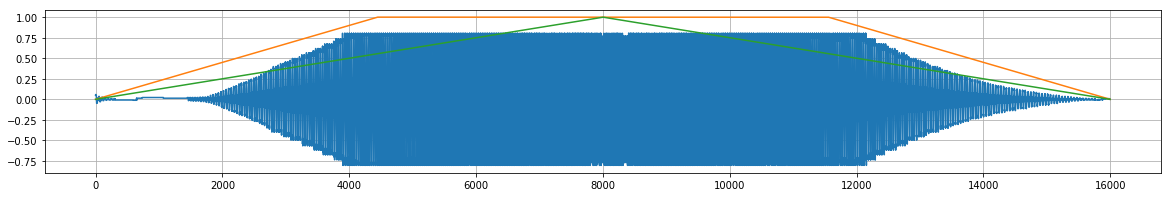

In [56]:
# Generate!
#*************************************
from IPython.display import Audio, display

genlen= int(1*sr) #not including priming

def fsweep(snum) :   #nsnum is sample number not including priming
    t=snum/genlen #snum/params['sample_rate']
    p=2*(.5-np.abs(.5-t))
    v=np.minimum(1.,3.6*(.5-np.abs(.5-t)))
    #if (t<0.01) :
    #    v=0
    #elif t<.3 :
    #    v=.5
    #elif t<.5 :
    #   v=0
    #elif t<.7 :
    #    v=1
    #else :
    #    v=0
    i=0
    # return np.array([i,v,1-v, p])  #pressure2
    return np.array([i,v, p]) 


signal = generate(rnn, genlen, primer=myprimer, paramvect=fsweep)
#plot_signal(signal)

p = [fsweep(t) for t in range(genlen)]
q=[x[1:3] for x in p]

print("signal length is {}".format(len(signal[seqLen:])))
print("p length is {}".format(len(p[1:2])))

plt.figure(figsize=(20,3)) 
plt.plot(np.arange(len(signal[seqLen:])), signal[seqLen:]) #just print one example from the batch
#plt.plot(np.arange(len(signal[256:])), p[:,2]) #just print one example from the batch
plt.plot(np.arange(len(q)), q) #just print one example from the batch
plt.grid()
plt.show()

display(Audio(signal[seqLen:], rate=sr, autoplay=False))

### Three squarewave pressure params of different stengths

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7febc0476fd0>>
Traceback (most recent call last):
  File "/home/lonce/anaconda3/envs/snn/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/lonce/anaconda3/envs/snn/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/lonce/anaconda3/envs/snn/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/lonce/anaconda3/envs/snn/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/lonce/anaconda3/envs/snn/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/lonce/anaconda3/envs/snn/lib/python3.

signal length is 32000
p length is 1


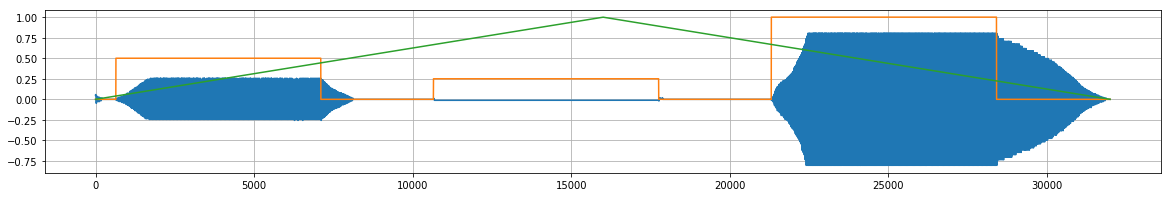

In [57]:
# Generate!
#*************************************
from IPython.display import Audio, display

genlen= int(2*sr) #not including priming

def fsweep(snum) :   #nsnum is sample number not including priming
    t=snum/genlen #snum/params['sample_rate']
    p=2*(.5-np.abs(.5-t))
    #v=.5*2*(.5-np.abs(.5-t))
    if (t<0.02) :
        v=0
    elif t<.222 :
        v=.5
    elif t<.333 :
        v=0
    elif t<.555 :
        v=.25
    elif t<.666 :
        v=0
    elif t<.888 :
        v=1
    else :
        v=0
    i=0
    #return np.array([i,v,1-v, p])  #pressure2
    return np.array([i,v, p]) 


signal = generate(rnn,genlen, primer=myprimer, paramvect=fsweep)
#plot_signal(signal)

p = [fsweep(t) for t in range(genlen)]
q=[x[1:3] for x in p]

print("signal length is {}".format(len(signal[seqLen:])))
print("p length is {}".format(len(p[1:2])))

plt.figure(figsize=(20,3)) 
plt.plot(np.arange(len(signal[seqLen:])), signal[seqLen:]) #just print one example from the batch
#plt.plot(np.arange(len(signal[256:])), p[:,2]) #just print one example from the batch
plt.plot(np.arange(len(q)), q) #just print one example from the batch
plt.grid()
plt.show()

display(Audio(signal, rate=sr, autoplay=False))

signal length is 32000
p length is 1


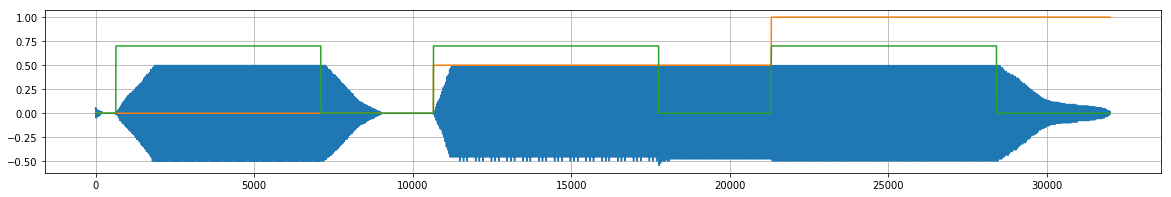

In [58]:
# Generate!
#*************************************
from IPython.display import Audio, display

genlen= int(2*sr) #not including priming

def fsweep(snum) :   #nsnum is sample number not including priming
    t=snum/genlen #snum/params['sample_rate']
    p=.25
    i=0
    v=0
    #v=.5*2*(.5-np.abs(.5-t))
    if (t<0.02) :
        v=0
        i=0
    elif t<.222 :
        v=.7
        i=0
    elif t<.333 :
        v=0
        i=0
    elif t<.444 :
        v=.7
        i=.5
    elif t<.555 :
        v=.7
        i=.5
    elif t<.666 :
        v=0
        i=.5
    elif t<.777 :
        v=.7
        i=1
    elif t<.888 :
        v=.7
        i=1
    elif t<=1.0 :
        v=0
        i=1

    #return np.array([i,v,1-v, p])  #pressure2
    return np.array([i,v, p]) 


signal = generate(rnn,genlen, primer=myprimer, paramvect=fsweep)
#plot_signal(signal)

p = [fsweep(t) for t in range(genlen)]
q=[x[0:2] for x in p]

print("signal length is {}".format(len(signal[seqLen:])))
print("p length is {}".format(len(p[1:2])))

plt.figure(figsize=(20,3)) 
plt.plot(np.arange(len(signal[seqLen:])), signal[seqLen:]) #just print one example from the batch
#plt.plot(np.arange(len(signal[256:])), p[:,2]) #just print one example from the batch
plt.plot(np.arange(len(q)), q) #just print one example from the batch
plt.grid()
plt.show()

display(Audio(signal, rate=sr, autoplay=False))

signal length is 16000
p length is 1


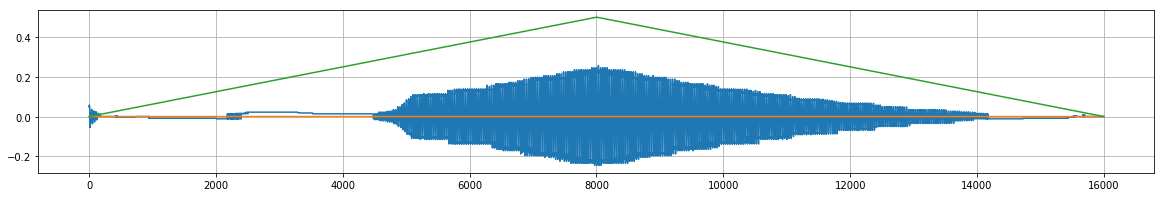

In [59]:
# Generate!
#*************************************
from IPython.display import Audio, display

genlen= int(sr) #not including priming

def fsweep1(snum) :   #nsnum is sample number not including priming
    t=snum/genlen #snum/params['sample_rate']
    p=.5
    i=0
    v=.5*2*(.5-np.abs(.5-t))
    #return np.array([i,v,1-v, p])  #pressure2
    return np.array([i,v, p]) 

def fsweep2(snum) :   #nsnum is sample number not including priming
    t=snum/genlen #snum/params['sample_rate']
    p=.5
    i=0
    v=0
    #v=.5*2*(.5-np.abs(.5-t))
    if (t<0.02) :
        v=0
        i=0
    elif t<.222 :
        v=.7
        i=0
    elif t<.333 :
        v=0
        i=0
    elif t<.444 :
        v=.7
        i=.5
    elif t<.555 :
        v=.7
        i=.5
    elif t<.666 :
        v=0
        i=.5
    elif t<.777 :
        v=.7
        i=1
    elif t<.888 :
        v=.7
        i=1
    elif t<=1.0 :
        v=0
        i=1

    #return np.array([i,v,1-v, p])  #pressure2
    return np.array([i,v, p]) 

def fsweep3(snum) :   #nsnum is sample number not including priming
    t=snum/genlen #snum/params['sample_rate']
    p=.5
    i=0
    v=0
    #v=.5*2*(.5-np.abs(.5-t))
    if (t<0.02) :
        v=0
        i=0
    elif t<.222 :
        v=.7
        i=0
    elif t<.333 :
        v=0
        i=0
    elif t<.444 :
        v=.7
        i=.5
    elif t<.555 :
        v=.7
        i=.5
    elif t<.666 :
        v=0
        i=.5
    elif t<.777 :
        v=.7
        i=1
    elif t<.888 :
        v=.7
        i=1
    elif t<=1.0 :
        v=0
        i=1

    #return np.array([i,v,1-v, p])  #pressure2
    return np.array([i,v, p]) 

signal = generate(rnn,genlen, primer=myprimer, paramvect=fsweep1)
#plot_signal(signal)

p = [fsweep1(t) for t in range(genlen)]
q=[x[0:2] for x in p]

print("signal length is {}".format(len(signal[seqLen:])))
print("p length is {}".format(len(p[1:2])))

plt.figure(figsize=(20,3)) 
plt.plot(np.arange(len(signal[seqLen:])), signal[seqLen:]) #just print one example from the batch
#plt.plot(np.arange(len(signal[256:])), p[:,2]) #just print one example from the batch
plt.plot(np.arange(len(q)), q) #just print one example from the batch
plt.grid()
plt.show()

display(Audio(signal, rate=sr, autoplay=False))

In [60]:
import random
fname = random.choice(datafiles)
fname

'even_069-a.0.0014-v.0.0375.wav'

### show one of the parameter contours from the original training data

param volume for fname even_071-a.0.1139-v.0.3375.wav


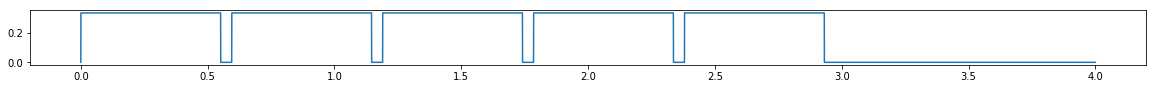

0.0,        0.0
1e-15,        0.3375
0.03375,        0.3375
0.55125,        0.3375
0.551250000000001,        0.0
0.585,        0.0
0.595,        0.0
0.595000000000001,        0.3375
0.6287499999999999,        0.3375
1.1462499999999998,        0.3375
1.1462500000000009,        0.0
1.1799999999999997,        0.0
1.1899999999999997,        0.0
1.1900000000000008,        0.3375
1.2237499999999997,        0.3375
1.7412499999999995,        0.3375
1.7412500000000006,        0.0
1.7749999999999995,        0.0
1.7849999999999995,        0.0
1.7850000000000006,        0.3375
1.8187499999999994,        0.3375
2.3362499999999993,        0.3375
2.33625,        0.0
2.369999999999999,        0.0
2.379999999999999,        0.0
2.38,        0.3375
2.413749999999999,        0.3375
2.931249999999999,        0.3375
2.93125,        0.0
2.964999999999999,        0.0
2.9749999999999988,        0.0
3.0,        0.0


In [61]:
#bookmark
import random

p=params['props'][1] # amplitude or pressure1
fname = random.choice(datafiles)
print("param {} for fname {}".format(p, fname))

duration=4

from paramManager import paramManager
pm=paramManager.paramManager(params['datadir'], params['paramdir'])
fooparams=pm.getParams(params['datadir'] + '/' + fname) #the path and extension are optional
newtime, newvals = pm.resampleParam(fooparams,p,16000*duration,timestart=0,timeend=duration,verbose=False,overwrite=False)

plt.figure(figsize=(20,1)) 
plt.plot(newtime, newvals) #just print one example from the batch
plt.show()
for i in range (len(fooparams[p]['times'])) :
    print("{},        {}".format( fooparams[p]['times'][i], fooparams[p]['values'][i]))

### Show the transition between primer and parameterized signal

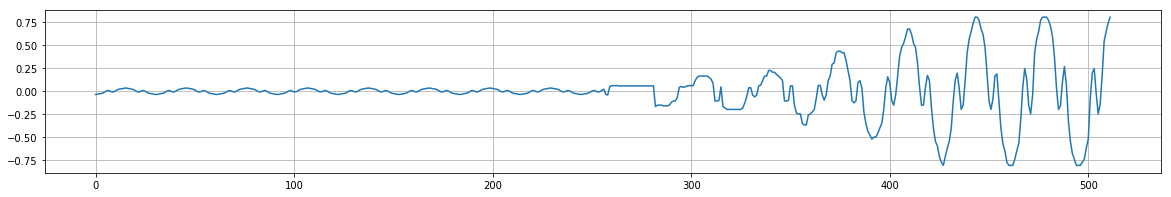

In [62]:
from IPython.display import Audio

# Generate!
#*************************************
#paramvect = torch.from_numpy(np.array([0,1,0.5])).type(torch.cuda.FloatTensor)
#paramvect = np.array([0,1,0,0]) #pressure2
paramvect = np.array([1,1,.5]) 
signal = generate(rnn,max_length,paramvect=lambda n: paramvect, primer=None)#myprimer)
plt.figure(figsize=(20,3))
plt.plot(np.arange(len(signal[0:512])), signal[0:512])
plt.grid()
plt.show()

display(Audio(data=signal[0:512],rate=sr))


### Interactive square wave pressure parameter contour

In [63]:
from ipywidgets import interact,interactive
from ipywidgets import FloatSlider

genlen= int(.6*sr) #not including priming

gi=0
gv=0
gp=0


def fsweep(snum) :   #nsnum is sample number not including priming
    
    t=snum/genlen #snum/params['sample_rate']
    if (t<0.1) :
        v=0
    elif t<.7 :
        v=gv
    else :
        v=0
    return np.array([gi,v, gp]) 


def widgetfunc(x,y,z):
    paramvect = np.array([x,y,z])
    global gi
    global gv
    global gp
    
    gi=x
    gv=y
    gp=z
    
    signal = generate(rnn,genlen,primer=myprimer,paramvect = fsweep)
    
    p = [fsweep(t) for t in range(genlen)]
    q=[x[1:3] for x in p]


    plt.figure(figsize=(20,3))
    #lot_signal(signal[seqLen:max_length])
    plt.plot(np.arange(len(signal[seqLen:])), signal[seqLen:]) 
    
    plt.plot(np.arange(len(q)), q) #just print one example from the batch
    
    plt.grid()
    plt.show()
    display(Audio(data=signal[0:],rate=sr))
    return signal
    
xslider=FloatSlider(min=0, max=1, step=.01, value=1.0, continuous_update=False, description='instID')
yslider=FloatSlider(min=0, max=1, step=.01, value=1.0, continuous_update=False, description='pressure1')
zslider=FloatSlider(min=0, max=1, step=.01, value=0.5,  continuous_update=False, description='midiPitch')

w = interactive(widgetfunc, x=xslider, y=yslider, z=zslider)
display(w)

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='instID', max=1.0, step=0.01…